<a href="https://colab.research.google.com/github/dennissmain/newrepoforme/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"okwechimedennis","key":"6fe6243728461bfabe24475cd0694376"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mahdiehhajian/bank-marketing/

Dataset URL: https://www.kaggle.com/datasets/mahdiehhajian/bank-marketing/versions/
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 101MB/s]


In [ ]:
!unzip bank-marketing.zip

Archive:  bank-marketing.zip
  inflating: bank-additional/bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional/bank-additional.csv  
  inflating: bank/bank-full.csv      
  inflating: bank/bank-names.txt     
  inflating: bank/bank.csv           


In [ ]:
df = pd.read_csv('/content/bank-additional/bank-additional/bank-additional-full.csv', sep= ";")
df.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.describe() . T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
df['y'] = df['y'].map({'no':0,'yes':1})

In [ ]:
df['job'].value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [ ]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


JOBS

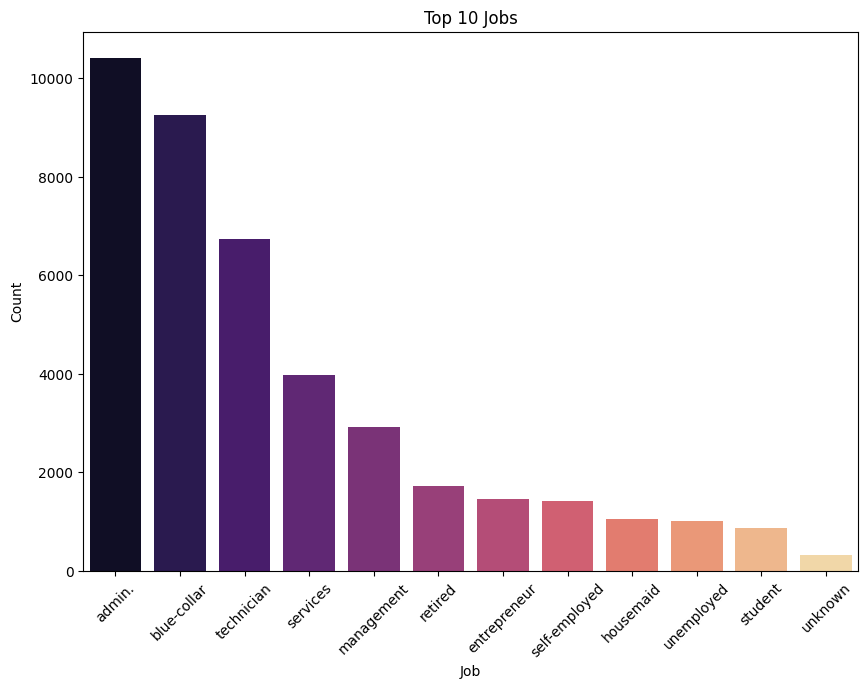

In [ ]:
#Top 12 jobs

job_counts = df['job'].value_counts().nlargest(12)

plt.figure(figsize=(10, 7))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='magma')
plt.title('Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

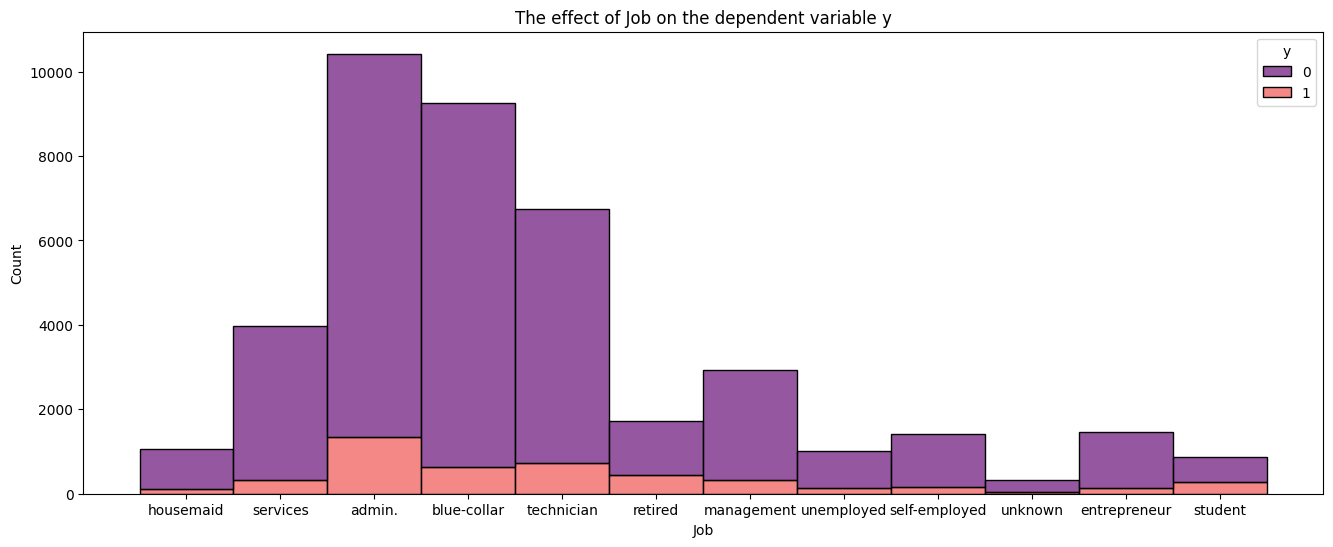

In [ ]:
#Impact of type of job on dependent variable

plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='job', hue='y', multiple='stack', palette='magma')
plt.title('The effect of Job on the dependent variable y')
plt.xlabel('Job')
plt.ylabel('Count')

plt.show()

AGE

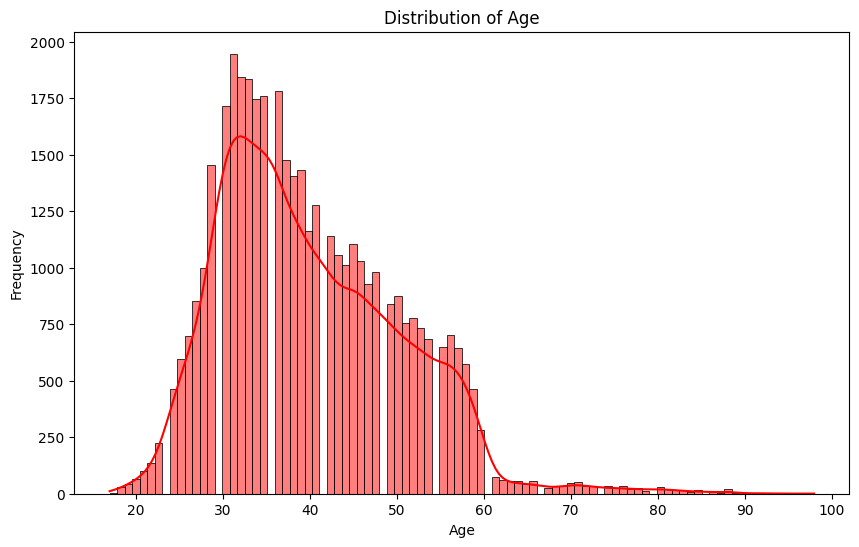

In [ ]:
#Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

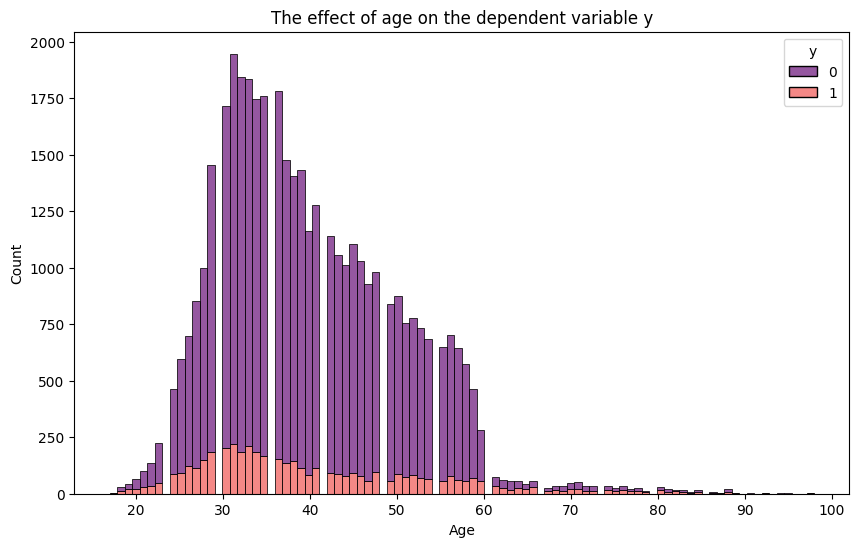

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', multiple='stack', palette='magma')
plt.title('The effect of age on the dependent variable y')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

Marital status

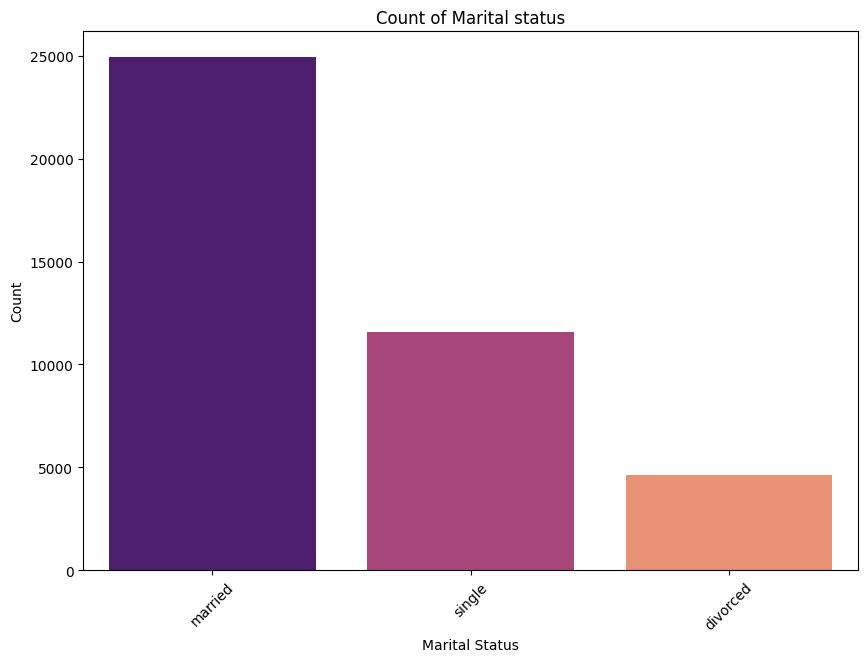

In [ ]:
marital_count = df['marital'].value_counts().nlargest(3)

plt.figure(figsize=(10, 7))
sns.barplot(x=marital_count.index, y=marital_count.values, palette='magma')
plt.title('Count of Marital status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

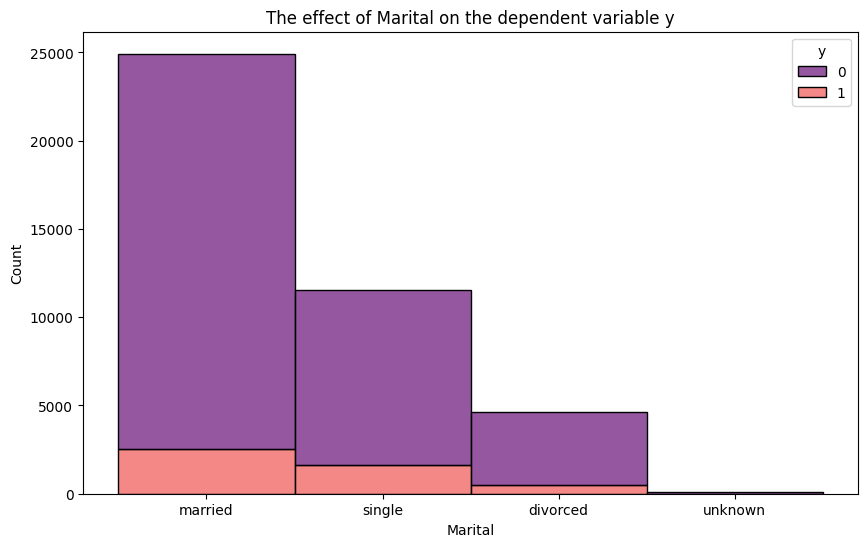

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='marital', hue='y', multiple='stack', palette='magma')

plt.title('The effect of Marital on the dependent variable y')
plt.xlabel('Marital')
plt.ylabel('Count')

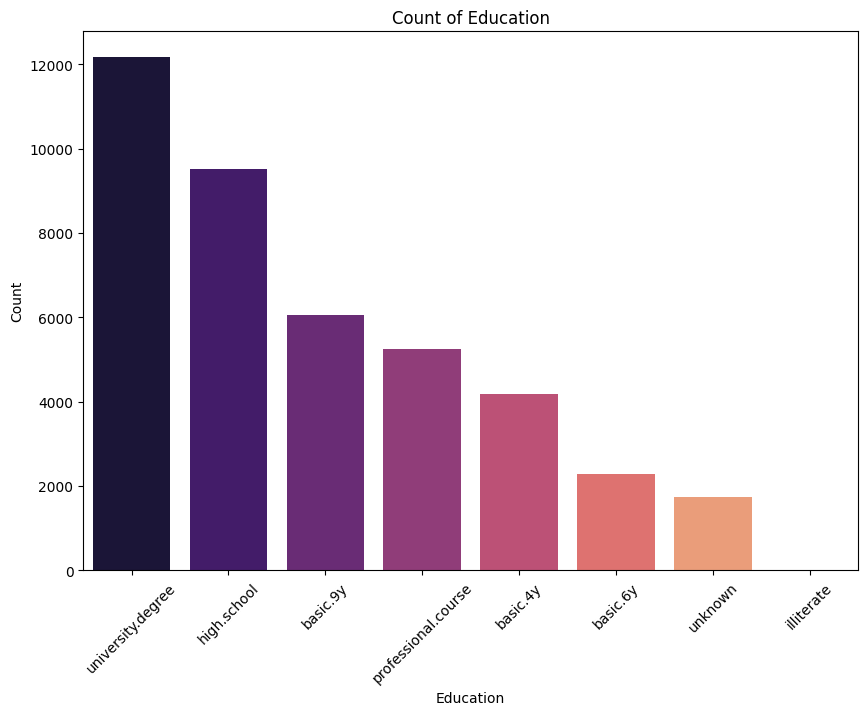

In [ ]:
education_count = df['education'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=education_count.index, y=education_count.values, palette='magma')
plt.title('Count of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

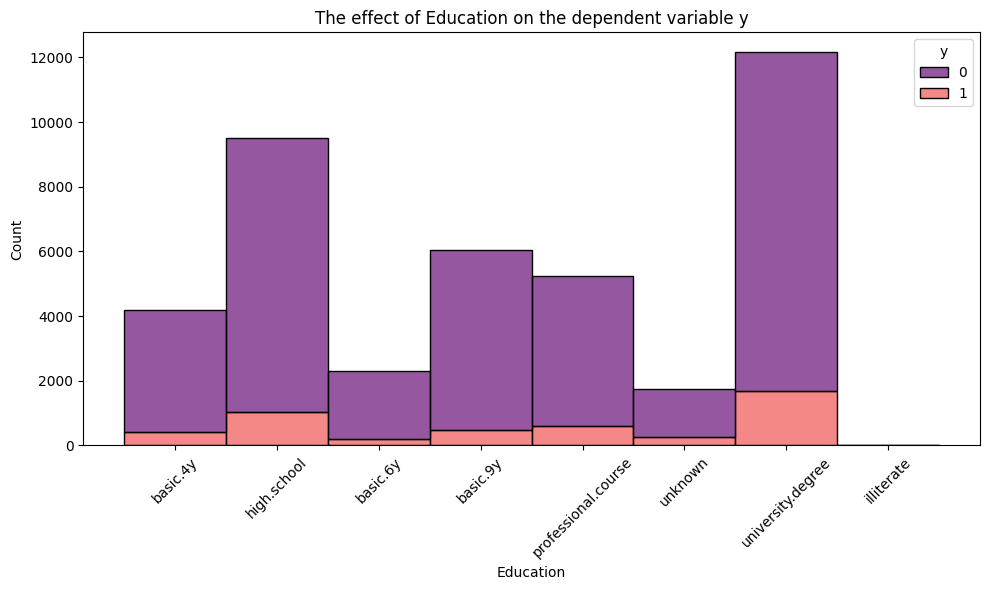

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='education', hue='y', multiple='stack', palette='magma')
plt.title('The effect of Education on the dependent variable y')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()

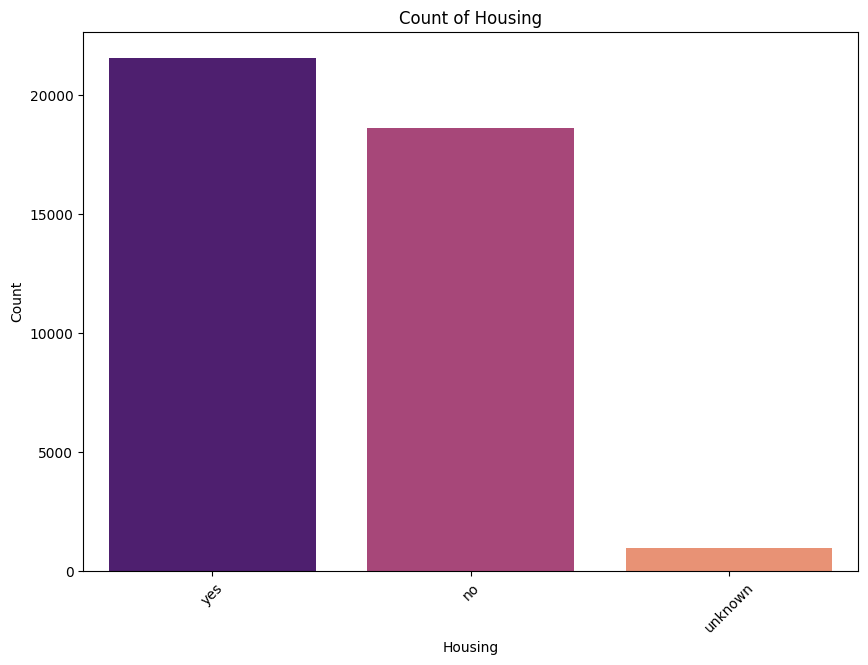

In [ ]:
housing_count = df['housing'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=housing_count.index, y=housing_count.values, palette='magma')
plt.title('Count of Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

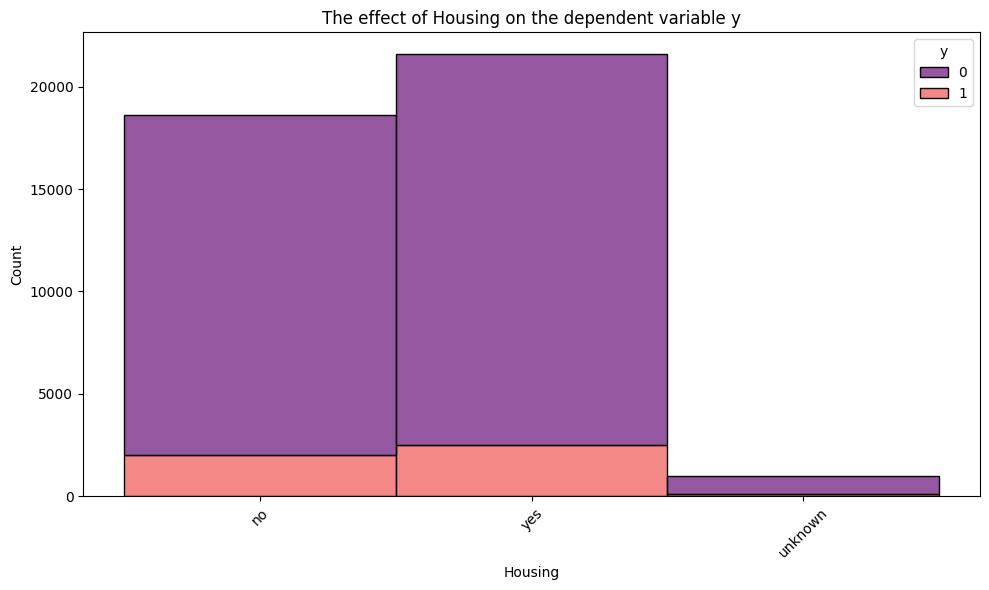

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='housing', hue='y', multiple='stack', palette='magma')
plt.title('The effect of Housing on the dependent variable y')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()

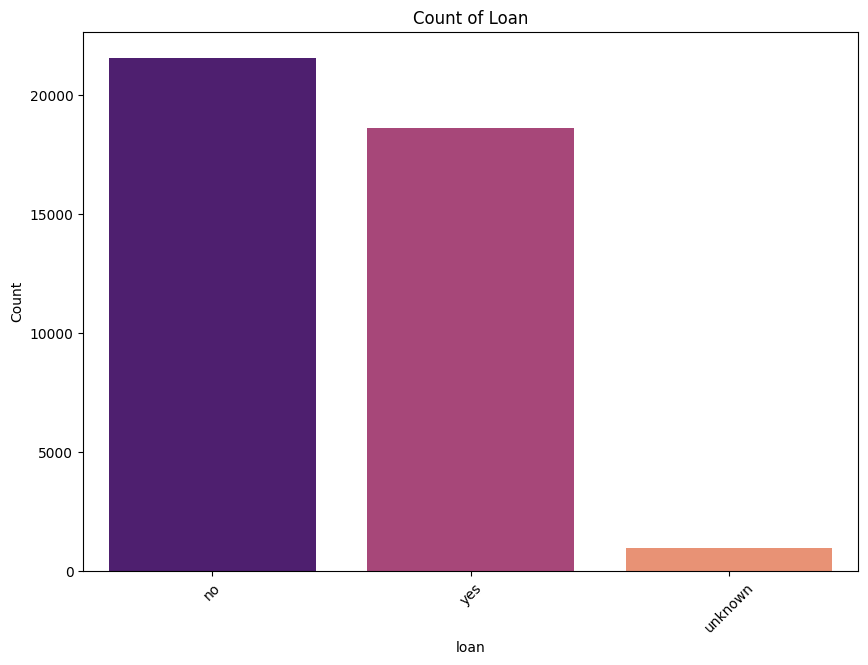

In [ ]:
loan_count = df['loan'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=loan_count.index, y=housing_count.values, palette='magma')
plt.title('Count of Loan')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

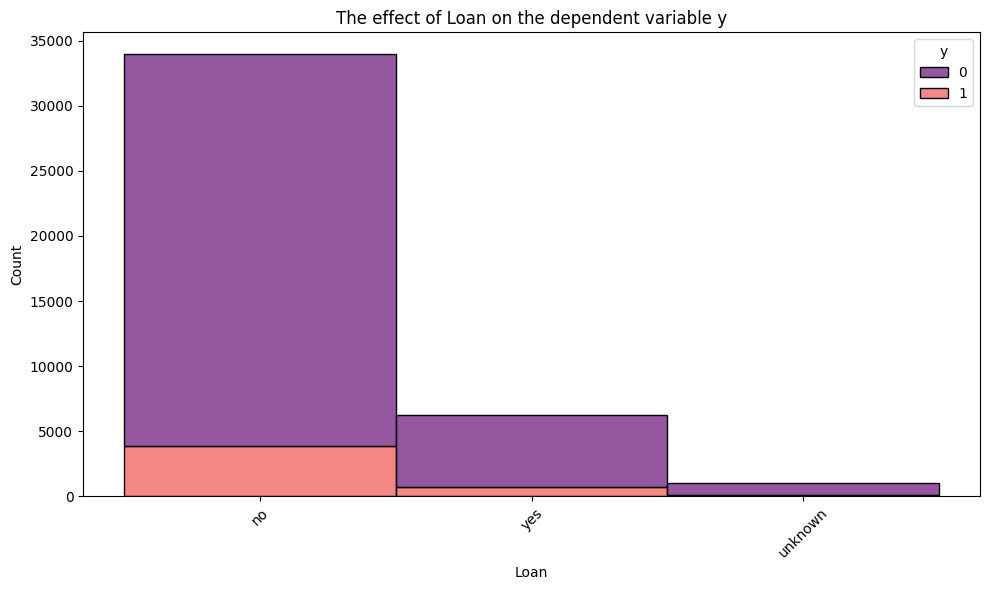

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan', hue='y', multiple='stack', palette='magma')
plt.title('The effect of Loan on the dependent variable y')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()

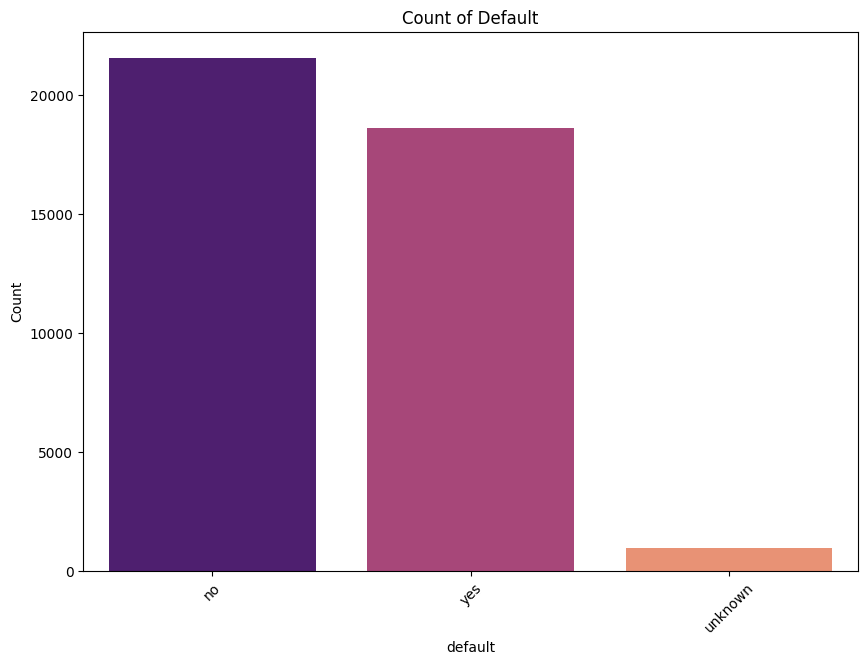

In [ ]:
default_count = df['default'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=loan_count.index, y=housing_count.values, palette='magma')
plt.title('Count of Default')
plt.xlabel('default')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

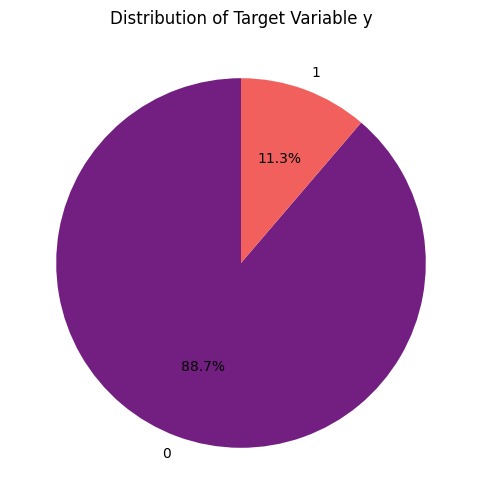

In [ ]:
y_counts = df['y'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', colors=sns.color_palette("magma", 2), startangle=90)
plt.title('Distribution of Target Variable y')
plt.show()

Label Encoder

In [ ]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: job
0 -> admin.
1 -> blue-collar
2 -> entrepreneur
3 -> housemaid
4 -> management
5 -> retired
6 -> self-employed
7 -> services
8 -> student
9 -> technician
10 -> unemployed
11 -> unknown

Column: marital
0 -> divorced
1 -> married
2 -> single
3 -> unknown

Column: education
0 -> basic.4y
1 -> basic.6y
2 -> basic.9y
3 -> high.school
4 -> illiterate
5 -> professional.course
6 -> university.degree
7 -> unknown

Column: default
0 -> no
1 -> unknown
2 -> yes

Column: housing
0 -> no
1 -> unknown
2 -> yes

Column: loan
0 -> no
1 -> unknown
2 -> yes

Column: contact
0 -> cellular
1 -> telephone

Column: month
0 -> apr
1 -> aug
2 -> dec
3 -> jul
4 -> jun
5 -> mar
6 -> may
7 -> nov
8 -> oct
9 -> sep

Column: day_of_week
0 -> fri
1 -> mon
2 -> thu
3 -> tue
4 -> wed

Column: poutcome
0 -> failure
1 -> nonexistent
2 -> success



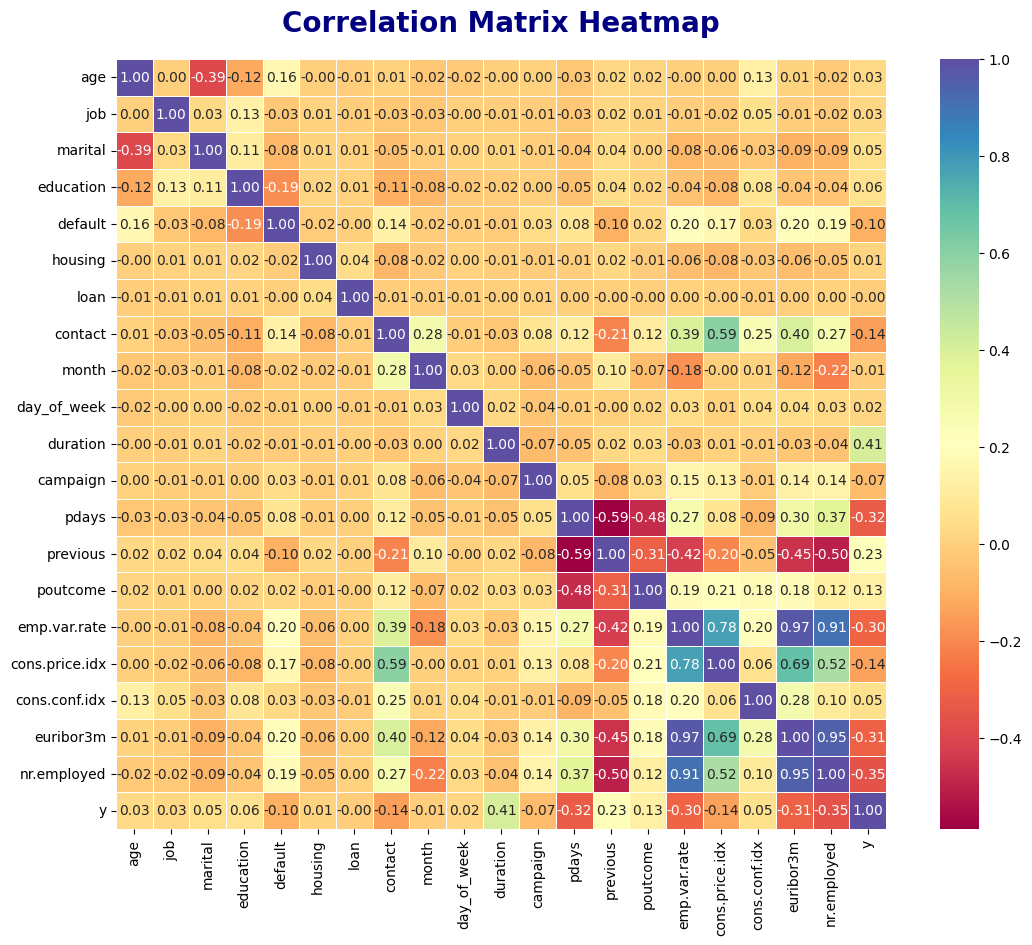

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5, cbar=True, square=True, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap', fontsize=20, fontweight='bold', pad=20, color='navy')
plt.show()

Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('y',axis = 1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(32950, 20) (8238, 20)


Random Forest

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_accuracy

0.9130857004127215

XGBoost

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)
xg_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xg_y_pred)
xgb_accuracy

0.9146637533381888

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_accuracy

0.8945132313668366

MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_y_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_accuracy

0.8860160233066279

CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
cat_y_pred = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, cat_y_pred)
catboost_accuracy

0.9217042971595047

Hybrid Model ( CatBoost + RandomForest)

#Models with the highest accuracy were used.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
xgb_probs = xgb_model.predict_proba(X_test)
catboost_probs = catboost_model.predict_proba(X_test)

# Assign weights based on performance
catboost_weight = 0.7  # CatBoost has the higher weight
xgb_weight = 0.3       # XGBoost has the lower weight

# Combine probabilities using weighted averaging
hybrid_probs = (catboost_weight * catboost_probs) + (xgb_weight * xgb_probs)

# Final prediction: take the class with the highest combined probability
hybrid_pred = np.argmax(hybrid_probs, axis=1)

# Evaluate hybrid accuracy
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
hybrid_accuracy

0.9201262442340374

Comparison of Models

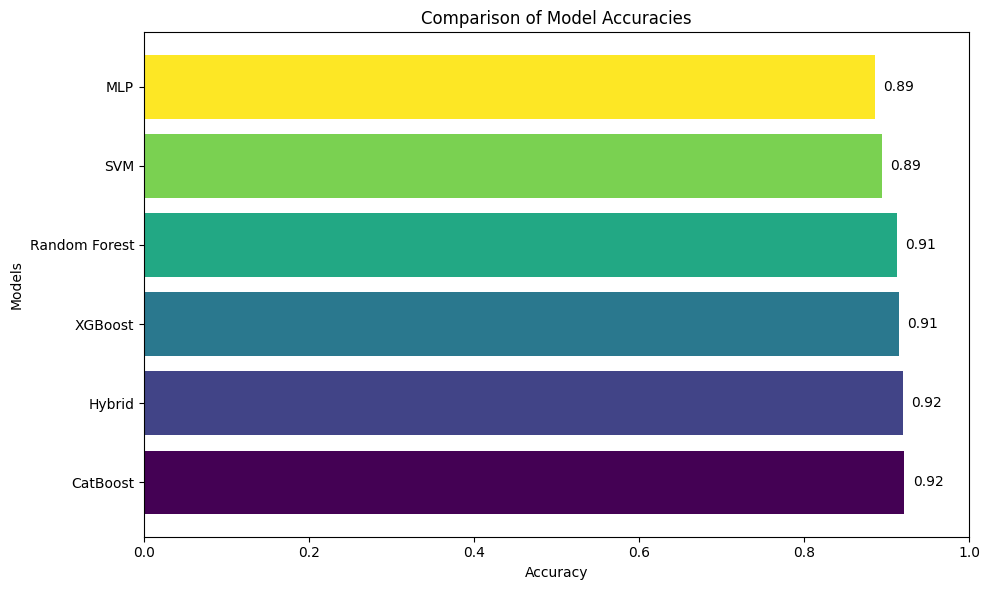

In [ ]:
models = ['Random Forest', 'XGBoost', 'SVM', 'MLP', 'CatBoost', 'Hybrid']
accuracies = [rf_accuracy, xgb_accuracy, svm_accuracy, mlp_accuracy, catboost_accuracy, hybrid_accuracy]
#Sorting the horizonal bar
sorted_indices = np.argsort(accuracies)[::-1]  # Get indices for sorting in descending order
models = [models[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=colors)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)

# Add accuracy labels to the bars
for bar, accuracy in zip(bars, accuracies):
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2, f'{accuracy:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()